# IE5054 Data Analytics Homework 1, James Tan, r13921031

### Problem 1 ###
(1) When we play “Poker” with a deck (each player gets 5 cards out of 52 regardless of the jokers), why is the “Full-house” more valuable than the “Flush”?
 - clubs (♣), diamonds (♦), hearts (♥), and spades (♠)
 - Total number of possible 5-card poker hands = C(52,5) = 2,598,960
 - References: https://en.wikipedia.org/wiki/Poker_probability

#### Full-house ####
 - comprises a triple and a pair, regardless of the suits, for example 7♣7♦7♥2♣2♠ or K♦K♥K♣7♣7♦.
 - For a Full House:
    - First choose which rank will be the triple ( 13 choices )
    - Then choose which 3 cards of that rank ( C(4,3) = 4 combinations )
    - Then choose which rank will be the pair ( 12 remaining choices )
    - Then choose which 2 cards of that rank ( C(4,2) = 6 combinations )
 - Total Full House combinations = 13 × 4 × 12 × 6 = 3,744
 - Full House probability ≈ 3,744/2,598,960 ≈ 0.144% (approximately 1 in 694)

#### Flush ####
 - contains any five cards with the same suit but no straight values
 - for example: 2♥5♥8♥9♥J♥ or 3♠6♠9♠Q♠K♠ is a flush but A♠2♠3♠4♠5♠ or 10♥J♥Q♥K♥A♥ doesn’t count.
 - For a Flush:
    - First choose which suit (4 choices)
    - Then choose 5 cards from the 13 cards of that suit, excluding straight combinations (about C(13,5) - 10 straight combinations)
 - So approximately 4 × (1,287 - 10) = 5,108
 - Flush probability ≈ 5,108/2,598,960 ≈ 0.197% (approximately 1 in 508)

Conclusion: The Full House is ranked higher because it's actually rarer than a Flush.

### Problem 2 ###
Suppose two teams, E and W, are playing the NBA finals (a series of 7 games), where the series is done when E or W wins four matches firstly.  
If each match is independently won by team E with probability 𝑝 and by team W with probability 1 − 𝑝.   
Find the expected number of matches that are played, and evaluate this expected number when 𝑝 = 1/2.?  
Ref: https://daesungk.github.io/a3307202b01b9c16a2895904bdcd6559/hw5-sol.pdf   


- We need the expected number of games until one team wins 4 games.
- Each game is independent with probability p for team E.
- The series ends as soon as either team wins 4 games.
- This is a special case of [negative binomial distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution), but we need to account for both teams potentially winning.
- r=4 is the number of wins.
- k is the number of losses.
- p is the probability of wins for the team E on each trial.
- $f_E(k) = f_E( k; r=4, p ) = \binom{k+4-1}{k} (1-p)^k p^4 = \binom{k+3}{k} (1-p)^k p^4$
- $f_W(k) = f_W( k; r=4, 1-p ) = \binom{k+4-1}{k} (p)^k (1-p)^4 = \binom{k+3}{k} (p)^k (1-p)^4$

The series can end in:  
4 games: 4-0 $f_E (0) + f_W (0) = \binom{3}{0} [ (1-p)^0 p^4 + p^0 (1-p)^4 ]$  
5 games: 4-1 $f_E (1) + f_W (1) = \binom{4}{1} [ (1-p)^1 p^4 + p^1 (1-p)^4 ]$  
6 games: 4-2 $f_E (2) + f_W (2) = \binom{5}{2} [ (1-p)^2 p^4 + p^2 (1-p)^4 ]$  
7 games: 4-3 $f_E (3) + f_W (3) = \binom{6}{3} [ (1-p)^3 p^4 + p^3 (1-p)^4 ]$  

First, let's find the probability of a series ending in exactly k games:  
For k=4, r=4 (sweep):
Team E: $p^4$
Team W: $(1-p)^4$
Total: $p^4 + (1-p)^4$

For k=5:
Team E winning: $\binom{4}{3} p^4 (1-p)$
Team W winning: $\binom{4}{3} (1-p)^4 p$
Total: $\binom{4}{3} [ p^4 (1-p) + (1-p)^4 p ]$

For k=6:
Team E winning: $\binom{5}{3} p^4 (1-p)^2$
Team W winning: $\binom{5}{3} (1-p)^4 p^2$
Total: $\binom{5}{3} [ p^4 (1-p)^2 + (1-p)^4 p^2 ]$

For k=7:
Team E winning: $\binom{6}{3} p^4 (1-p)^3$
Team W winning: $\binom{6}{3} (1-p)^4 p^3$
Total: $\binom{6}{3} [ p^4 (1-p)^3 + (1-p)^4 p^3 ]$

Therefore, the expected number of games E(X) is:
$E(X) = 4[p^4 + (1-p)^4] + 5[\binom{4}{3}(p^4(1-p) + (1-p)^4p)] + 6[\binom{5}{3}(p^4(1-p)^2 + (1-p)^4p^2)] + 7[\binom{6}{3}(p^4(1-p)^3 + (1-p)^4p^3)]$

For p = 1/2, let's calculate:
P(4 games) = $2 * (1/2)^4 = 2 * (1/16) = 1/8$
P(5 games) = $2 * \binom{4}{3} * (1/2)^5 = 2 * 4 * (1/32) = 1/4$
P(6 games) = $2 * \binom{5}{3} * (1/2)^6 = 2 * 10 * (1/64) = 5/16$
P(7 games) = $2 * \binom{6}{3} * (1/2)^7 = 2 * 20 * (1/128) = 5/16$

Expected number = $4P(4) + 5P(5) + 6P(6) + 7P(7) = 4*(1/8) + 5*(1/4) + 6*(5/16) + 7*(5/16) = 0.5 + 1.25 + 1.875 + 2.1875 = 5.8125$

In [1]:
from math import comb

# Define the probability p
p = 1/2

# Calculate the probability of the series ending in exactly k games
P_4 = 2 * (p ** 4)
P_5 = 2 * comb(4, 3) * (p ** 5)
P_6 = 2 * comb(5, 3) * (p ** 6)
P_7 = 2 * comb(6, 3) * (p ** 7)

# Calculate the expected number of games
E_X = (4 * P_4) + (5 * P_5) + (6 * P_6) + (7 * P_7)
print(E_X)


5.8125


### Problem 3 ###
A fountain show starts every 80 minutes, you arrive at the place at random and decide to wait for 20 minutes, what’s the probability you will witness the show?

1. Uniform Distribution of Arrival Time:  
Since you arrive at a random time (you arrive at the place at random), your arrival time is uniformly distributed over the 80-minute interval.

2. Condition for Witnessing the Show:  
You will witness the show if it occurs during the 20 minutes you are waiting. This happens if your arrival time falls within 20 minutes before the start of a show.

3. Length of Favorable Interval:  
The favorable interval for witnessing the show is 20 minutes out of the total 80-minute cycle.

4. Probability Calculation:  
The probability is simply the ratio of the favorable interval to the total interval: $P = \frac{Favorable Interval}{Total Interval} = \frac{20}{80} = \frac{1}{4} = .25%$

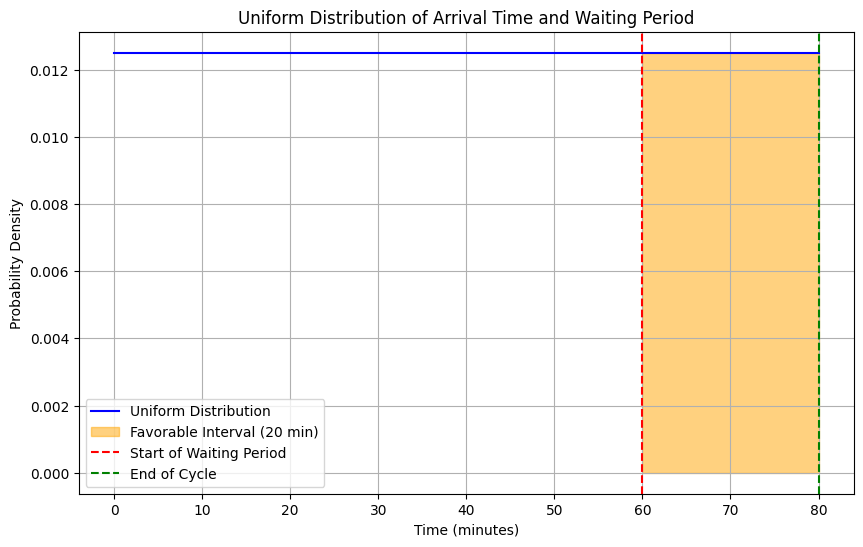

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
cycle_duration = 80  # Total cycle duration in minutes
wait_time = 20       # Waiting time in minutes

# Create a uniform distribution over the cycle duration
x = np.linspace(0, cycle_duration, 1000)
y = np.ones_like(x) / cycle_duration  # Uniform distribution height

# Highlight the favorable interval (last 20 minutes of the cycle)
favorable_start = cycle_duration - wait_time
favorable_x = np.linspace(favorable_start, cycle_duration, 100)
favorable_y = np.ones_like(favorable_x) / cycle_duration

# Plot the uniform distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Uniform Distribution", color='blue')
plt.fill_between(favorable_x, favorable_y, color='orange', alpha=0.5, label="Favorable Interval (20 min)")
plt.axvline(favorable_start, color='red', linestyle='--', label="Start of Waiting Period")
plt.axvline(cycle_duration, color='green', linestyle='--', label="End of Cycle")

# Add labels and legend
plt.title("Uniform Distribution of Arrival Time and Waiting Period")
plt.xlabel("Time (minutes)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

### Problem 4 ###
At the NTU post office, a pair of clerks work at distinct levels of efficiency: 
 - clerk 1's service time follows an exponential dist. with rate μ_1  
 - clerk 2's service time follows an exponential dist. with rate μ_2  
John arrived at the postal office and started receiving service from clerk 1 at precisely 8:00.   

a. Mary enters at 8:10, what is the probability she sees John is still being served by clerk 1? 

### Context
- John's service time $T_1$ follows an exponential distribution with rate $\mu_1$: $T_1 \sim \text{Exp}(\mu_1)$.  
- The cumulative distribution function (CDF) of an exponential random variable is given by:  
  $F(t) = P(T_1 \leq t) = 1 - e^{-\mu_1 t}$
- Therefore, the probability that $T_1 > t$ is: $P(T_1 > t) = 1 - P(T_1 \leq t) =  e^{-\mu_1 t}$

### Description
- John starts service at 8:00.
- Mary arrives at 8:10, which is 10 minutes ($t = 10$) later.

We want $P(T_1 > 10)$, the probability that John's service time exceeds 10 minutes.  
Using the formula for $P(T_1 > t)$: $P(T_1 > 10) = e^{-\mu_1 \cdot 10}$  
The probability that Mary sees John still being served by Clerk 1 when she enters is: $P(T_1 > 10) = e^{-10\mu_1}$

#### **Step 1: Define Remaining Service Times**
- Because the exponential distribution has the [**memoryless property**](https://en.wikipedia.org/wiki/Memorylessness), the remaining service time for John, given that he has already been in service for 10 minutes, is still exponentially distributed: $T_1' \sim \text{Exp}(\mu_1)$

  The memoryless property states that: $P(T_1 > t + 10 \mid T_1 > 10) = P(T_1' > t) = e^{-\mu_1 t}$

  Thus, the remaining time John's service takes is still exponentially distributed with rate $\mu_1$.

- Similarly, Mary's service time $T_2$ follows an independent exponential distribution: $T_2 \sim \text{Exp}(\mu_2)$

b. Given that John is still being served at 8:10, we want to compute the probability that Mary, who starts service at 8:10 with Clerk 2, finishes her service before John finishes his.
Hint: Memoryless Property

#### **Step 1.5 : Claim** #### 
$P(T_2 < T_1') = \frac{\mu_2}{\mu_1 + \mu_2}$
where $ T_1' \sim \text{Exp}(\mu_1) $ and $ T_2 \sim \text{Exp}(\mu_2) $, meaning that their probability density functions (PDFs) are:

$f_{T_1'}(t) = \mu_1 e^{-\mu_1 t}, \quad t \geq 0$
$f_{T_2}(t) = \mu_2 e^{-\mu_2 t}, \quad t \geq 0$

Since $T_1'$ and $T_2$ are independent, we can compute:
$P(T_2 < T_1') = \int_0^\infty P(T_2 < t) f_{T_1'}(t) dt$

##### **Step 1.5-1: Compute $ P(T_2 < t) $**
The cumulative distribution function (CDF) of $T_2$ is:

$P(T_2 < t) = \int_0^t \mu_2 e^{-\mu_2 x} dx$

Computing this integral:

$P(T_2 < t) = \left[ -e^{-\mu_2 x} \right]_0^t = 1 - e^{-\mu_2 t}$

##### **Step1.5-2: Compute the Integral**
Substituting $ P(T_2 < t) $ into the main integral:

$P(T_2 < T_1') = \int_0^\infty (1 - e^{-\mu_2 t}) \mu_1 e^{-\mu_1 t} dt$

Splitting the integral:

$P(T_2 < T_1') = \mu_1 \int_0^\infty e^{-\mu_1 t} dt - \mu_1 \int_0^\infty e^{-(\mu_1 + \mu_2)t} dt$

Computing each integral:

$\int_0^\infty e^{-\mu_1 t} dt = \frac{1}{\mu_1}$

$\int_0^\infty e^{-(\mu_1 + \mu_2) t} dt = \frac{1}{\mu_1 + \mu_2}$

Thus:
$P(T_2 < T_1') = \mu_1 \cdot \frac{1}{\mu_1} - \mu_1 \cdot \frac{1}{\mu_1 + \mu_2} = 1 - \frac{\mu_1}{\mu_1 + \mu_2} = \frac{\mu_2}{\mu_1 + \mu_2}$

#### **Step 2: Compute $P(T_2 < T_1')$**
The key observation here is that if we have two independent exponential random variables:

- $ T_1' \sim \text{Exp}(\mu_1) $
- $ T_2 \sim \text{Exp}(\mu_2) $

Then, the probability that Mary finishes before John is given by: $P(T_2 < T_1') = \frac{\mu_2}{\mu_1 + \mu_2}$

This result follows from the fact that if $X \sim \text{Exp}(\lambda_1)$ and $Y \sim \text{Exp}(\lambda_2)$, then: $P(X < Y) = \frac{\lambda_1}{\lambda_1 + \lambda_2} $

Applying this to problem 4: $P(T_2 < T_1') = \frac{\mu_2}{\mu_1 + \mu_2}$

### **Answers**
(a) The probability that Mary sees John still being served is: $e^{-10\mu_1}$

(b) The probability that Mary finishes before John, given that he is still being served, is: $\frac{\mu_2}{\mu_1 + \mu_2}$

### Problem 5 ###
John lives in city A and goes to work every morning by taking one train and then connecting to a local bus in city B.  
To avoid being late for work, he must arrive no later than 8h30.   
John always takes the train at 8h00.  
The trajectory between A and B takes exactly 10 minutes.    
According to the long-term observation, the train is of a delay probability distribution as the table below

| Delay (min) | Probability |
|---|---|
| 4 | 1/16 |
| 6 | 1/8 |
| 8 | 1/2 |
| 10 | 1/4 |
| 12 | 1/16 |

Another uncertainty to his office is that the bus is not stable either.  
Averagely, a bus arrives at the train station of city B to pick up passengers at 8h20 and then the trip is exactly 10 minutes to arrive John’s office.  
According to another survey, the bus schedule is following the Normal distribution with the average departure time at 8h20 from the train station and a standard deviation of 2 minutes.  
Assume the train delay and the bus uncertainty are independent. What is the probability that John will be late for work?  
* Hint: Interaction of Two Random Variables

### **Step 1: Define the Problem**  
John's arrival at his office depends on two random variables:  
1. **Train Delay ($X$)**: Given as a discrete probability distribution.
2. **Bus Departure Time ($Y$)**: Follows a normal distribution.

John takes the train at **8:00**, and the train ride is exactly **10 minutes**.   
So, in the absence of delays, he would arrive at City B at **8:10**.  
However, due to train delays, his actual arrival time at City B is:  $T_{\text{train}} = 8:10 + X$ where $X$ is the train delay.

The bus's departure time Y follows a normal distribution: $Y \sim \mathcal{N}(8:20, 2^2)$

John is late if either:
1. **Misses the bus**: $ T_{\text{train}} > Y $ (i.e., the bus departs before John arrives at city B).
2. **Catches the bus but still arrives late**: $T_{\text{train}} \leq Y$ and $ T_{\text{bus}} > 8:30 $, meaning $ Y > 8:20 $.

We need to compute:
$P(T_{\text{train}} > Y) + P(T_{\text{train}} \leq Y, Y > 8:20)$

### **Step 2: Compute Probabilities**
$P(\text{John will be late for work})$  
$ = P(\text{Misses the bus}) + P(\text{Catches the bus but still arrives late})$  
$ = P(T_{\text{train}} > Y) + P(T_{\text{train}} \leq Y, Y > 8:20)$  
$ = 0.7402 + 0.1299$   
$ = 0.8701$ 
1. $ P(T_{\text{train}} > Y) = P(8:10 + X > Y) = 0.7402$.
2. $ P(T_{\text{train}} \leq Y, Y > 8:20) = 0.1299$.

1. $ P(T_{\text{train}} > Y) = P(8:10 + X > Y) = 0.7402 $.

In [14]:
import scipy.stats as stats

# Given probability distribution of train delay
X_values = [4, 6, 8, 10, 12]
P_X = [1/16, 1/8, 1/2, 1/4, 1/16]

# Parameters of normal distribution for bus departure
mu_Z = 10  # Mean of Z (bus departure - 10)
sigma_Z = 2  # Standard deviation of Z

# Compute P(Z > X) where Z ~ N(10,2)
P_Z_greater_X = [1 - stats.norm.cdf((x - mu_Z) / sigma_Z) for x in X_values]
# print(P_Z_greater_X) 
# [0.9986501019683699, 0.9772498680518208, 0.8413447460685429, 0.5, 0.15865525393145707]

# Compute total probability P(T < Y)
P_T_less_Y = sum(p_x * p_z for p_x, p_z in zip(P_X, P_Z_greater_X))

print(f"Probability that the train arrives before the bus departs: {P_T_less_Y:.4f}")
print(f"Probability that the train arrives after the bus departs: {1-P_T_less_Y:.4f}")

0.7402 + 0.2598*.5

[0.9986501019683699, 0.9772498680518208, 0.8413447460685429, 0.5, 0.15865525393145707]
Probability that the train arrives before the bus departs: 0.7402
Probability that the train arrives after the bus departs: 0.2598


0.8701

2. $ P(T_{\text{train}} \leq Y, Y > 8:20) = P(T_{\text{train}} \leq Y) \times P(Y > 8:20)= 0.2598 \times 0.5000 = 0.1299$.

In [13]:
import scipy.stats as stats

# Parameters of normal distribution for bus departure
mu_Z = 20  # Mean of Z (bus departure in minutes past the hour)
sigma_Z = 2  # Standard deviation of Z

# Calculate Z-score for Y = 8:30
z_score_830 = (30 - mu_Z) / sigma_Z

# Calculate probability of bus departing between 8:20 and 8:30
prob_bus_830 = stats.norm.cdf(z_score_830) - stats.norm.cdf(0)

print(f"Probability of bus departing between 8:20 and 8:30: {prob_bus_830:.4f}")

Probability of bus departing between 8:20 and 8:30: 0.5000


The probability that John will be late for work is approximately **87.01%**.

### Problem 6-a ###
Assume in average 1 out of 100 people has cancer (1%) and the cancer detection rate with current X-ray scan is accurate up to 99%.   
One day, John is diagnosed as positive in the X-ray cancer scan.
What is the probability that John really has the cancer?

|                   | Scan Positive | Scan Negative | Total |
| :---------------- | :------------ | :------------ | :---- |
| **Has Cancer** | 99 (TP)       | 1 (FN)        | 100   |
| **No Cancer** | 99 (FP)       | 9,801 (TN)    | 9,900 |
| **Total** | 198           | 9,802         | 10,000 |

The probability that John really has cancer is: 0.5000


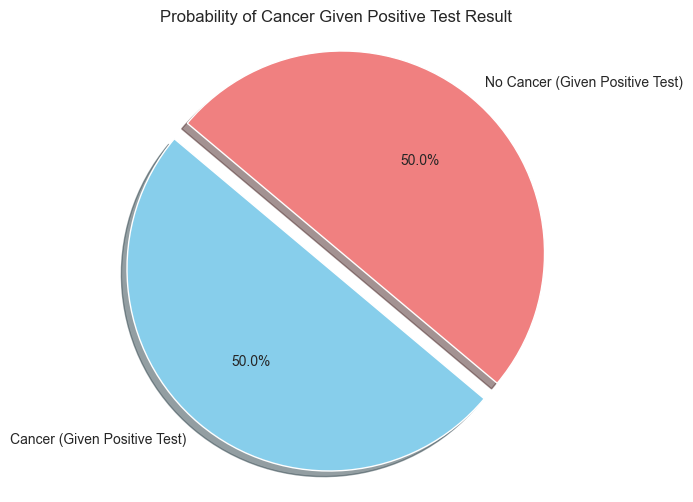

In [10]:
import matplotlib.pyplot as plt

def calculate_cancer_probability(population_cancer_rate, test_accuracy):
    """
    Calculates the probability of having cancer given a positive test result.

    Args:
        population_cancer_rate: The percentage of the population with cancer (e.g., 0.01 for 1%).
        test_accuracy: The accuracy of the test (e.g., 0.99 for 99%).

    Returns:
        The probability of having cancer given a positive test result.
    """

    # Probability of having cancer
    p_cancer = population_cancer_rate

    # Probability of not having cancer
    p_no_cancer = 1 - population_cancer_rate

    # Probability of a positive test given cancer
    p_positive_given_cancer = test_accuracy

    # Probability of a positive test given no cancer (false positive)
    p_positive_given_no_cancer = 1 - test_accuracy

    # Probability of a positive test (total)
    p_positive = (p_cancer * p_positive_given_cancer) + (p_no_cancer * p_positive_given_no_cancer)

    # Probability of cancer given a positive test (Bayes' theorem)
    p_cancer_given_positive = (p_positive_given_cancer * p_cancer) / p_positive

    return p_cancer_given_positive

# Given values
population_cancer_rate = 0.01  # 1%
test_accuracy = 0.99  # 99%

# Calculate the probability
probability = calculate_cancer_probability(population_cancer_rate, test_accuracy)

print(f"The probability that John really has cancer is: {probability:.4f}")

# Visualization
labels = ['Cancer (Given Positive Test)', 'No Cancer (Given Positive Test)']
sizes = [probability, 1 - probability]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Probability of Cancer Given Positive Test Result')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

We can solve this problem using **Bayes' Theorem**, which helps us find the probability of having cancer given a positive test result.

### Given Data:
- **Prior Probability of Cancer**: $ P(C) = 0.01 $ (1% of people have cancer)
- **Sensitivity (True Positive Rate)**: $ P(\text{Pos} | C) = 0.99 $ (99% accurate for detecting cancer)
- **False Positive Rate**: $ P(\text{Pos} | \neg C) = 0.01 $ (1% of healthy people also test positive)

We want to calculate:
$
P(C | \text{Pos})
$
which is the probability that John **actually** has cancer given that he tested positive.

### Bayes' Theorem:
$
P(C | \text{Pos}) = \frac{P(\text{Pos} | C) P(C)}{P(\text{Pos})}
$
where:
$
P(\text{Pos}) = P(\text{Pos} | C) P(C) + P(\text{Pos} | \neg C) P(\neg C)
$
Substituting the values:

$
P(\text{Pos}) = (0.99 \times 0.01) + (0.01 \times 0.99)
$

$
= 0.0099 + 0.0099 = 0.0198
$

Now, applying Bayes' Theorem:

$
P(C | \text{Pos}) = \frac{0.99 \times 0.01}{0.0198}
$

$
= \frac{0.0099}{0.0198} = 0.5
$

### Answer:
The probability that John actually has cancer given a **positive test result** is **50%**.

### Problem 6-b. ###
Assume in average 1 out of 100 people has cancer (1%) and the cancer detection rate with current X-ray scan is accurate up to 99%.   
One day, John is diagnosed as positive in the X-ray cancer scan.
Since John knows Bayes’ theorem very well, he decides to make an MRI check to know more details of his health.   
It is known that MRI check has 99.9% accuracy detecting cancer.    
Unfortunately, John is diagnosed again positive after the MRI check.   
What is the probability that John has the cancer now?
* Hint: Bayes’ Theorem

Probability of cancer after positive X-ray: 0.500000 or 50.0000%
Probability of cancer after positive X-ray AND positive MRI: 0.999000 or 99.9000%


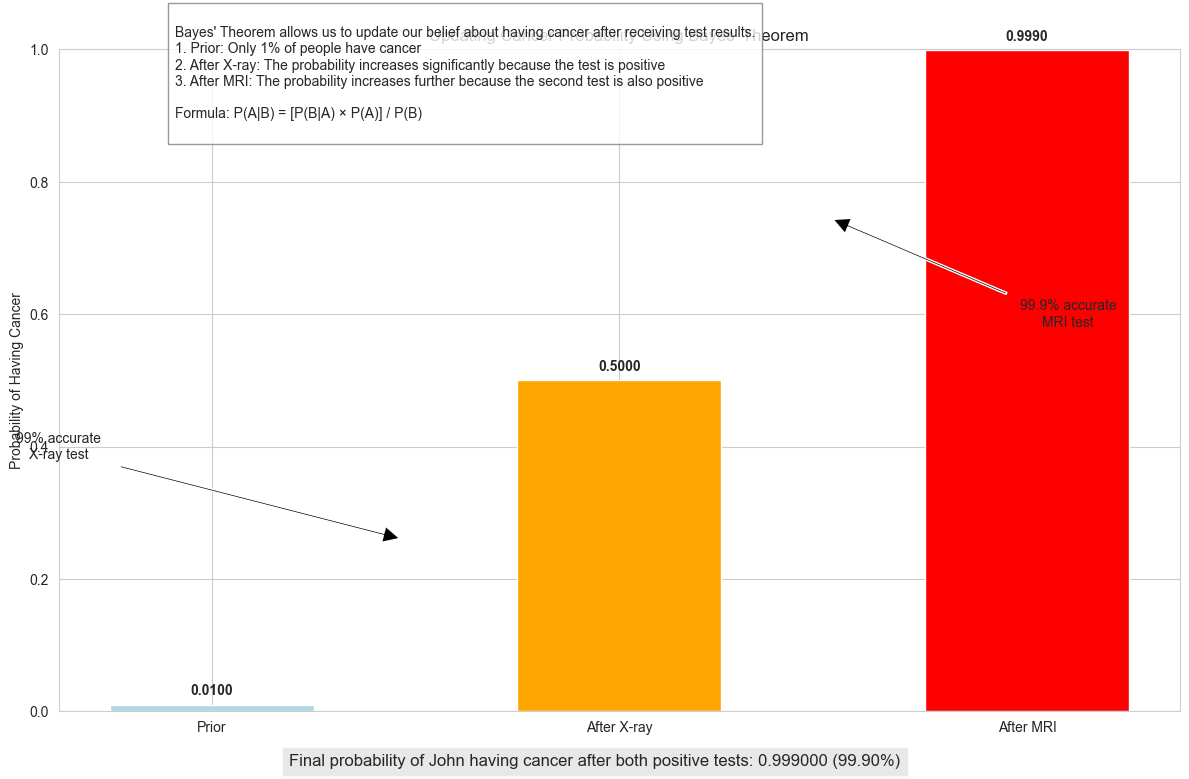

<Figure size 1200x600 with 0 Axes>

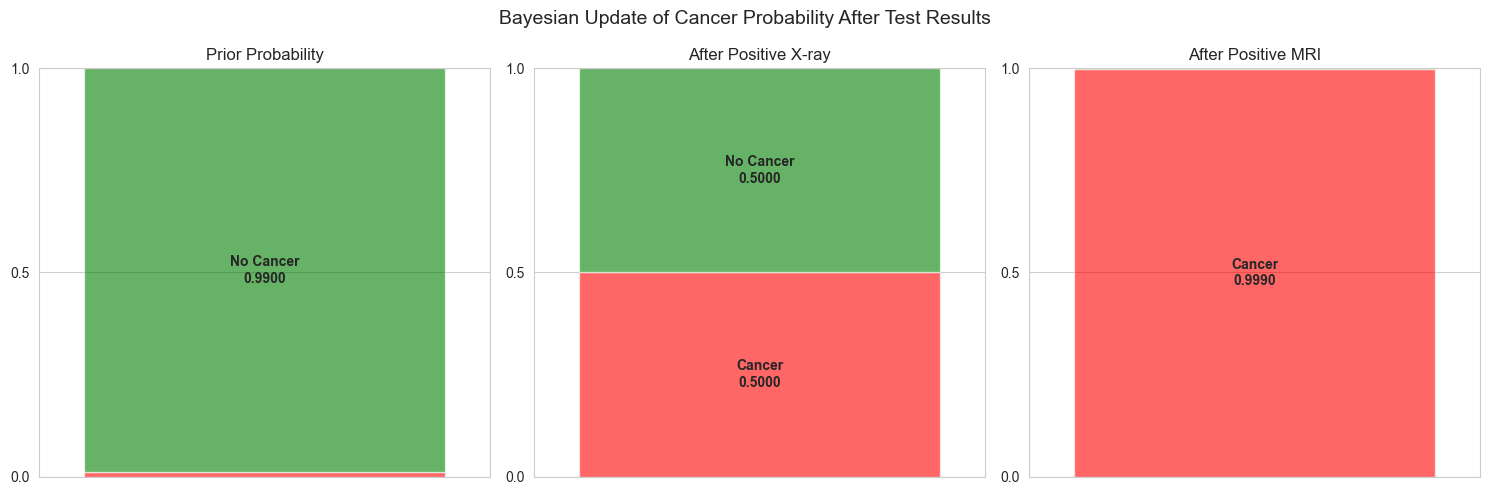

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

# Initial probabilities
p_cancer = 0.01  # Prior probability of cancer
p_xray_pos_given_cancer = 0.99  # True positive rate for X-ray
p_xray_pos_given_no_cancer = 0.01  # False positive rate for X-ray
p_mri_pos_given_cancer = 0.999  # True positive rate for MRI
p_mri_pos_given_no_cancer = 0.001  # False positive rate for MRI

# Calculate probability after X-ray (using Bayes' theorem)
p_cancer_given_xray_pos = (p_xray_pos_given_cancer * p_cancer) / (
    p_xray_pos_given_cancer * p_cancer + 
    p_xray_pos_given_no_cancer * (1 - p_cancer)
)

print(f"Probability of cancer after positive X-ray: {p_cancer_given_xray_pos:.6f} or {p_cancer_given_xray_pos*100:.4f}%")

# Calculate probability after MRI (using Bayes' theorem again)
p_cancer_given_xray_and_mri_pos = (p_mri_pos_given_cancer * p_cancer_given_xray_pos) / (
    p_mri_pos_given_cancer * p_cancer_given_xray_pos + 
    p_mri_pos_given_no_cancer * (1 - p_cancer_given_xray_pos)
)

print(f"Probability of cancer after positive X-ray AND positive MRI: {p_cancer_given_xray_and_mri_pos:.6f} or {p_cancer_given_xray_and_mri_pos*100:.4f}%")

# Create visualization
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Set up the plot
stages = ["Prior", "After X-ray", "After MRI"]
probabilities = [p_cancer, p_cancer_given_xray_pos, p_cancer_given_xray_and_mri_pos]
colors = ["lightblue", "orange", "red"]

# Create bar chart
bars = plt.bar(stages, probabilities, color=colors, width=0.5)

# Add probability values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}',
             ha='center', va='bottom', fontweight='bold')

# Add annotations and arrows to show update process
plt.annotate("99% accurate\nX-ray test", 
             xy=(0.5, (p_cancer + p_cancer_given_xray_pos)/2), 
             xytext=(0, 0.4),
             textcoords="axes fraction",
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             horizontalalignment='center', verticalalignment='center')

plt.annotate("99.9% accurate\nMRI test", 
             xy=(1.5, (p_cancer_given_xray_pos + p_cancer_given_xray_and_mri_pos)/2), 
             xytext=(0.9, 0.6),
             textcoords="axes fraction",
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             horizontalalignment='center', verticalalignment='center')

# Add explanatory text
plt.figtext(0.5, 0.01, 
           f"Final probability of John having cancer after both positive tests: {p_cancer_given_xray_and_mri_pos:.6f} ({p_cancer_given_xray_and_mri_pos*100:.2f}%)", 
           ha="center", fontsize=12, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

# Set plot labels and title
plt.ylabel('Probability of Having Cancer')
plt.title("Updating Cancer Probability Using Bayes' Theorem")
plt.ylim(0, 1.0)

# Add a detailed explanation box
explanation = """
Bayes' Theorem allows us to update our belief about having cancer after receiving test results.
1. Prior: Only 1% of people have cancer
2. After X-ray: The probability increases significantly because the test is positive
3. After MRI: The probability increases further because the second test is also positive

Formula: P(A|B) = [P(B|A) × P(A)] / P(B)
"""
plt.figtext(0.15, 0.8, explanation, fontsize=10, 
           bbox={"facecolor":"white", "edgecolor":"gray", "alpha":0.8, "pad":5})

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Create a visual representation of the Bayesian update process
plt.figure(figsize=(12, 6))

def plot_probability_rectangle(ax, prob, pos, label, color):
    rect = Rectangle(pos, 0.8, prob, facecolor=color, alpha=0.6)
    ax.add_patch(rect)
    if prob > 0.05:  # Only add text if rectangle is big enough
        ax.text(pos[0] + 0.4, pos[1] + prob/2, f"{label}\n{prob:.4f}", 
                ha='center', va='center', fontweight='bold')
    return rect

# Three subplots for each stage
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Prior probabilities
ax1.set_title("Prior Probability")
plot_probability_rectangle(ax1, p_cancer, (0.1, 0), "Cancer", "red")
plot_probability_rectangle(ax1, 1-p_cancer, (0.1, p_cancer), "No Cancer", "green")
ax1.set_ylim(0, 1)
ax1.set_xlim(0, 1)
ax1.set_yticks([0, 0.5, 1])
ax1.set_xticks([])

# After X-ray
ax2.set_title("After Positive X-ray")
plot_probability_rectangle(ax2, p_cancer_given_xray_pos, (0.1, 0), "Cancer", "red")
plot_probability_rectangle(ax2, 1-p_cancer_given_xray_pos, (0.1, p_cancer_given_xray_pos), "No Cancer", "green")
ax2.set_ylim(0, 1)
ax2.set_xlim(0, 1)
ax2.set_yticks([0, 0.5, 1])
ax2.set_xticks([])

# After MRI
ax3.set_title("After Positive MRI")
plot_probability_rectangle(ax3, p_cancer_given_xray_and_mri_pos, (0.1, 0), "Cancer", "red")
plot_probability_rectangle(ax3, 1-p_cancer_given_xray_and_mri_pos, (0.1, p_cancer_given_xray_and_mri_pos), "No Cancer", "green")
ax3.set_ylim(0, 1)
ax3.set_xlim(0, 1)
ax3.set_yticks([0, 0.5, 1])
ax3.set_xticks([])

plt.suptitle("Bayesian Update of Cancer Probability After Test Results", fontsize=14)
plt.tight_layout()
plt.show()

To calculate the probability that John has cancer after both the X-ray and MRI tests, we will again use **Bayes' Theorem**. The approach is very similar to the previous problem, but we will incorporate the MRI test results as well.

### Step 1: Define the Parameters

#### From the X-ray Test:
- **Prior Probability of Cancer**: $ P(C) = 0.01 $ (1% of people have cancer)
- **False Positive Rate for X-ray**: $ P(\text{Pos}_{\text{X-ray}} | \neg C) = 0.01 $ (1% of healthy people test positive in X-ray)
- **Sensitivity (True Positive Rate) for X-ray**: $ P(\text{Pos}_{\text{X-ray}} | C) = 0.99 $ (99% accurate in detecting cancer)

#### From the MRI Test:
- **Sensitivity (True Positive Rate) for MRI**: $ P(\text{Pos}_{\text{MRI}} | C) = 0.999 $ (99.9% accuracy in detecting cancer)
- **False Positive Rate for MRI**: $ P(\text{Pos}_{\text{MRI}} | \neg C) = 0.001 $ (0.1% of healthy people test positive in MRI)

### Step 2: Apply Bayes' Theorem for the First Test (X-ray)

Let's first calculate the probability that John actually has cancer given a **positive X-ray** result. This was covered earlier in the previous question, and we already know that:
$
P(C | \text{Pos}_{\text{X-ray}}) = 0.5
$
This means there's a 50% chance that John has cancer given the positive result from the X-ray.

### Step 3: Incorporate the MRI Test

Now that we have the result from the X-ray, we need to update the probability based on the result from the MRI test.

Using Bayes' Theorem again:

$
P(C | \text{Pos}_{\text{X-ray}}, \text{Pos}_{\text{MRI}}) = \frac{P(\text{Pos}_{\text{MRI}} | C) P(C | \text{Pos}_{\text{X-ray}})}{P(\text{Pos}_{\text{MRI}} | \text{Pos}_{\text{X-ray}})}
$

Where:

$
P(\text{Pos}_{\text{MRI}} | \text{Pos}_{\text{X-ray}}) = P(\text{Pos}_{\text{MRI}} | C) P(C | \text{Pos}_{\text{X-ray}}) + P(\text{Pos}_{\text{MRI}} | \neg C) P(\neg C | \text{Pos}_{\text{X-ray}})
$

### Step 4: Calculate $ P(\text{Pos}_{\text{MRI}} | \text{Pos}_{\text{X-ray}}) $

- $ P(\text{Pos}_{\text{MRI}} | C) = 0.999 $
- $ P(C | \text{Pos}_{\text{X-ray}}) = 0.5 $
- $ P(\text{Pos}_{\text{MRI}} | \neg C) = 0.001 $
- $ P(\neg C | \text{Pos}_{\text{X-ray}}) = 1 - P(C | \text{Pos}_{\text{X-ray}}) = 0.5 $

Now, calculate the total probability of a positive MRI given a positive X-ray:

$
P(\text{Pos}_{\text{MRI}} | \text{Pos}_{\text{X-ray}}) = (0.999 \times 0.5) + (0.001 \times 0.5)
$
$
= 0.4995 + 0.0005 = 0.5
$

### Step 5: Calculate $ P(C | \text{Pos}_{\text{X-ray}}, \text{Pos}_{\text{MRI}}) $

Now we can use Bayes' Theorem to calculate the updated probability that John has cancer after both tests:

$
P(C | \text{Pos}_{\text{X-ray}}, \text{Pos}_{\text{MRI}}) = \frac{0.999 \times 0.5}{0.5}
$
$
= \frac{0.4995}{0.5} = 0.999
$

### Final Answer:
The probability that John **really** has cancer after both the X-ray and MRI tests is **99.9%**.

### Problem 7 ###
[7][a] What is the probability that the birthdays of all the 25 students are different?

 - 365 : possible days for birthdays (ignoring leap year)
 - Calculate the probability of each subsequent student having a different birthday
 - For the probability of all different birthdays:

 - First student has a unique birthday with probability: $\frac{365}{365}$
 - Second student has a birthday different from the first with probability:  $\frac{365-1}{365}$ ( cannot be the same as the 1st student )
 - Given that the first two birthdays were different, the third student has a birthday different from those with probability:  $\frac{365-2}{365}$  ( cannot be the same as the 1st and 2nd student ) 
 - …
 - 25th student: $\frac{365-24}{365}$

## Birthday Paradox Calculation

The probability of no collisions in a group of 25 people can be calculated as follows:

**Exact Calculation:**

$$
P(\text{no collision}) = \frac{365 \times 364 \times 363 \times \cdots \times 341}{365^{25}}
$$

This can be rewritten as:

$$
P(\text{no collision}) = \frac{364}{365} \times \frac{363}{365} \times \frac{362}{365} \times \cdots \times \frac{341}{365}
$$

Further, it can be expressed as:

$$
P(\text{no collision}) = \left(1 - \frac{1}{365}\right) \times \left(1 - \frac{2}{365}\right) \times \left(1 - \frac{3}{365}\right) \times \cdots \times \left(1 - \frac{24}{365}\right)
$$

**Approximation using Exponential Function:**

Using the approximation $1 - x \approx e^{-x}$ for small values of $x$, we get:

$$
P(\text{no collision}) \approx e^{-\frac{1}{365}} \times e^{-\frac{2}{365}} \times e^{-\frac{3}{365}} \times \cdots \times e^{-\frac{24}{365}}
$$

Combining the exponents:

$$
P(\text{no collision}) \approx e^{\left(-\frac{1}{365} - \frac{2}{365} - \frac{3}{365} - \cdots - \frac{24}{365}\right)}
$$

$$
P(\text{no collision}) \approx e^{\frac{-(1 + 2 + 3 + \cdots + 24)}{365}}
$$

Using the formula for the sum of the first $n$ integers, $\sum_{i=1}^{n} i = \frac{n(n+1)}{2}$:

$$
P(\text{no collision}) \approx e^{\frac{-\frac{24(24+1)}{2}}{365}}
$$

$$
P(\text{no collision}) \approx e^{\frac{-24 \times 25}{2 \times 365}}
$$

$$
P(\text{no collision}) \approx e^{\frac{-25 \times 12}{365}}
$$

$$
P(\text{no collision}) \approx e^{-0.82191780821}
$$

$$
P(\text{no collision}) \approx 0.43958780049
$$

**Note:**

The provided approximation gives a result of approximately 0.43958780049. However, the exact calculation using Python code yields a result of approximately 0.4313002960305361. The approximation is close, but not perfectly accurate.

**Python Code Results:**

* Exact probability of no collisions for 25 people: 0.4313002960305361
* Approximate probability of no collisions for 25 people: 0.41048702478673266

In [2]:
import math

def birthday_probability(n, days=365):
    exact_prob = 1.0
    for i in range(n):
        exact_prob *= (days - i) / days
    
    # Approximation using exponentials
    approx_prob = math.exp(- (n * (n - 1)) / (2 * days))
    
    return exact_prob, approx_prob

def probability_at_least_one_collision(n, days=365):
    exact, approx = birthday_probability(n, days)
    return 1 - exact, 1 - approx

n_students = 25
exact_no_collision, approx_no_collision = birthday_probability(n_students)
exact_collision, approx_collision = probability_at_least_one_collision(n_students)

print(f"Exact probability of all different birthdays: {exact_no_collision:.10f}")
print(f"Approximate probability of all different birthdays: {approx_no_collision:.10f}")
print(f"Exact probability of at least one shared birthday: {exact_collision:.10f}")
print(f"Approximate probability of at least one shared birthday: {approx_collision:.10f}")

Exact probability of all different birthdays: 0.4313002960
Approximate probability of all different birthdays: 0.4395878005
Exact probability of at least one shared birthday: 0.5686997040
Approximate probability of at least one shared birthday: 0.5604121995


[7][b] What is the probability that at least two students have the same birthday?

This is the complement of the probability that all birthdays are different
P(at least one match) = 1 - P(all different) = 1 - 43.96 ≈ 0.5604 or about 56.04%

### Problem 8 ###
The proportion of people living in city A who are iPhone users is estimated to be $p = 0.4$.  
To test this hypothesis, a random survey of 600 people is conducted.  
After the statistical analysis, we decide that if the number of iPhone users is between 216 to 264, the hypothesis will be accepted; otherwise, we will conclude that $p \neq 0.4$.  
Please find the type I error probability $\alpha$ (rejecting the null hypothesis $H_0$ when it is true) for this analysis procedure, assuming that $p = 0.4$ for real.

### [DA01][P73] Proceeding a Hypothesis Testing ###
1. **Define the Null Hypothesis**
 - the Null Hypothesis, $H_0: p = 0.4$  
 - the Alternative Hypothesis $H_1: p \neq 0.4$  

2. **Find the Test Statistic**  
 - Let X be the number of iPhone users in our sample of n = 600 people.  
 - Under the null hypothesis $H_0: p = 0.4$, X follows a binomial distribution: $X \thicksim \text{Binomial}(n=600, p=0.4)$.  
 - normal approximation to the binomial: $X \thicksim N(np, np(1-p)) = N(600 \times 0.4, 600 \times 0.4 \times 0.6) = N(\mu=240, \sigma^2=144)$
 - The standardized test statistic (Z-score) is: $Z=\frac{X-\mu}{\sigma}=\frac{X-240}{12}$  

3. **Set the Critical Value and reject region**
 - The Null Hypothesis $H_0$ is accepted if $216 \le X \le 264$
 - $\Rightarrow$ The Null Hypothesis $H_0$ is rejected if : $X < 216 \text{ or } X > 264$
 - $\Rightarrow$ Rejection Region: $Z = \frac{X-240}{12} < \frac{216-240}{12} = -2 \text{ or } Z = \frac{X-240}{12} > \frac{264-240}{12} = 2$
 - $\Rightarrow$ Rejection Region: $Z < -2 \text{ or } Z > 2$

4. $H_0$ will then be rejected if and only if the observed or computed test statistic values falls in the reject region.
 - [DA01][P69] Type I error $\alpha$ (Flase Positive): $H_0$ is true. reject $H_0$
 - Since we're assuming p = 0.4 is true, the Type I error probability is the probability of getting a sample result outside our acceptance region.
 - $\alpha = P(\text{Type I error}) = P(Z < -2 or Z > 2) = P(Z < -2) + P(Z > 2) = 0.0455

The Type I error probability is approximately 0.0455 or about 4.55%.

In [1]:
import scipy.stats as stats

# Compute probabilities using the standard normal distribution
p_lower = stats.norm.cdf(-2)  # P(Z < -2)
p_upper = 1 - stats.norm.cdf(2)  # P(Z > 2)

# Compute Type I error probability (alpha)
alpha = p_lower + p_upper

print(f"Type I error probability (alpha): {alpha:.4f}")

Type I error probability (alpha): 0.0455


### Problem 9 ###
Suppose that the amount of time that a lightbulb works before burning itself out is exponentially distributed with mean 10 hours.  
Suppose that Jack enters a room in which the lightbulb is still working.  
If Jack desires to work for five hours to finish all his work.  
What is the probability that he can complete his work without the bulb burning out?  
What can be said about this probability when the distribution is not exponential?

### Step 1: Understanding the Exponential Distribution  
The lifetime of the lightbulb follows an [**exponential distribution**](https://en.wikipedia.org/wiki/Exponential_distribution) with a mean of **10 hours**. The exponential distribution has the probability density function (PDF):  

$f(t) = \lambda e^{-\lambda t}, \quad t \geq 0$ where $\lambda = \frac{1}{\text{mean}} = \frac{1}{10}$.  

The exponential distribution also satisfies the **memoryless property**, which states that the probability of survival beyond a given time does not depend on how long the bulb has already been working.  

### Step 2: Compute the Probability of Surviving 5 More Hours  
By the memoryless property, the probability that the bulb lasts at least 5 more hours **given that it is currently working** is:

$P(T > 5 \mid T > 0) = P(T > 5) = e^{-\lambda t} = e^{-5/10} = e^{-0.5}$

Approximating $ e^{-0.5}  \approx 0.6065306597126334$

Thus, the probability that Jack can complete his work without the bulb burning out is **0.6065** (or **60.65%**).


In [2]:
import math

result = math.exp(-0.5)
print(result)

0.6065306597126334


### Step 3: What Happens If the Distribution Is Not Exponential?  
If the lightbulb's lifetime follows a distribution that is **not** exponential, then the memoryless property **does not hold**. This means that the probability of the bulb surviving the next 5 hours depends on how long it has already been working.  

To be more specific.
0. If the lifetime follows a **normal distribution** with a mean of 10 hours and some variance, and if the bulb has already been working for a long time, it is more likely to burn out soon.
1. For distributions with increasing failure rate (like [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution) with shape parameter > 1, normal, or [gamma](https://en.wikipedia.org/wiki/Gamma_distribution) with shape > 1):
   - The probability would be lower than with exponential distribution
   - The longer the bulb has already been on, the more likely it is to fail soon

2. For distributions with decreasing failure rate (like Weibull with shape parameter < 1):
   - The probability would be higher than with exponential distribution
   - The longer the bulb has already been on, the more reliable it becomes for future use

3. For any specific non-exponential distribution, we would need to calculate the conditional probability:
   $P(T > t+5 | T > t)$ where $t$ is the time the bulb has already been on and $T$ is the lifetime

The key insight is that without the **memoryless** property in the exponential distribution, for other distributions the **history** (additional information about how long the bulb has already been in use) matters - how long the bulb has already been working affects the probability of it lasting 5 more hours.

### Problem 10 ###
course 1 : Probability & Statistics (Prob)  
course 2 : Operations Research (OR)  

these two courses are given in the same semester to the same group of students.   
Suppose we have 100 students with the following grades summary.  
(Grades are classified into Three levels, where A: excellent; B: average; C: failed.)
|   | Prob=A | Prob=B | Prob=C |
|-----|--------|--------|--------|
| OR=A   | 24     | 7      | 4      |
| OR=B   | 11     | 13     | 6      |
| OR=C   | 10     | 5      | 20     |

Please setup a hypothesis testing with 𝛼 = 0.01 to conclude if the grades in Prob and OR are related.

* Hint: $\chi^2$ test (Chi-squared test)

### Chi-Squared Test for Independence ###

### **Step 1: Define the Hypotheses**
- **Null Hypothesis ( $H_0$):** The grades in Prob and OR are independent.
- **Alternative Hypothesis (H₁):** The grades in Prob and OR are dependent (related).

### **Step 2: Construct the Observed Contingency Table**  
|   | Prob=A | Prob=B | Prob=C | Row Total |
|---|--------|--------|--------|-----------|
| OR=A | 24 | 7 | 4 | **35** |
| OR=B | 11 | 13 | 6 | **30** |
| OR=C | 10 | 5 | 20 | **35** |
| **Column Total** | **45** | **25** | **30** | **100** |

### **Step 3: Compute Expected Values**  
The expected value for each cell is given by:

$E_{ij} = \frac{\text{(Row Total)} \times \text{(Column Total)}}{\text{Grand Total}}$


Similarly, we compute expected values for all cells:

|   | Prob=A | Prob=B | Prob=C | Row Total |
|---|--------|--------|--------|-----------|
| OR=A | 15.75 | 8.75 | 10.50 | 35 |
| OR=B | 13.50 | 7.50 | 9.00 | 30 |
| OR=C | 15.75 | 8.75 | 10.50 | 35 |

### **Step 4: Compute the Chi-Square Statistic**
The Chi-Square statistic is:

$\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$

where $O_{ij}$ is the observed value and $E_{ij}$ is the expected value.

Observed Frequencies:
      Prob=A  Prob=B  Prob=C
OR=A      24       7       4
OR=B      11      13       6
OR=C      10       5      20


Row totals: [35 30 35]
Column totals: [45 25 30]
Grand total: 100


Expected Frequencies (under independence):
      Prob=A  Prob=B  Prob=C
OR=A   15.75    8.75    10.5
OR=B   13.50    7.50     9.0
OR=C   15.75    8.75    10.5


Chi-squared statistic (manual calculation): 26.4931
Degrees of freedom: 4
Critical value for α = 0.01 with 4 df: 13.2767
p-value: 0.000025

SciPy's chi2_contingency results:
Chi-squared statistic: 26.4931
p-value: 0.000025

Decision:
Reject H₀ (χ² = 26.4931 > 13.2767)
Conclusion: At α = 0.01, there is sufficient evidence to conclude that the grades in Probability & Statistics and Operations Research are related.


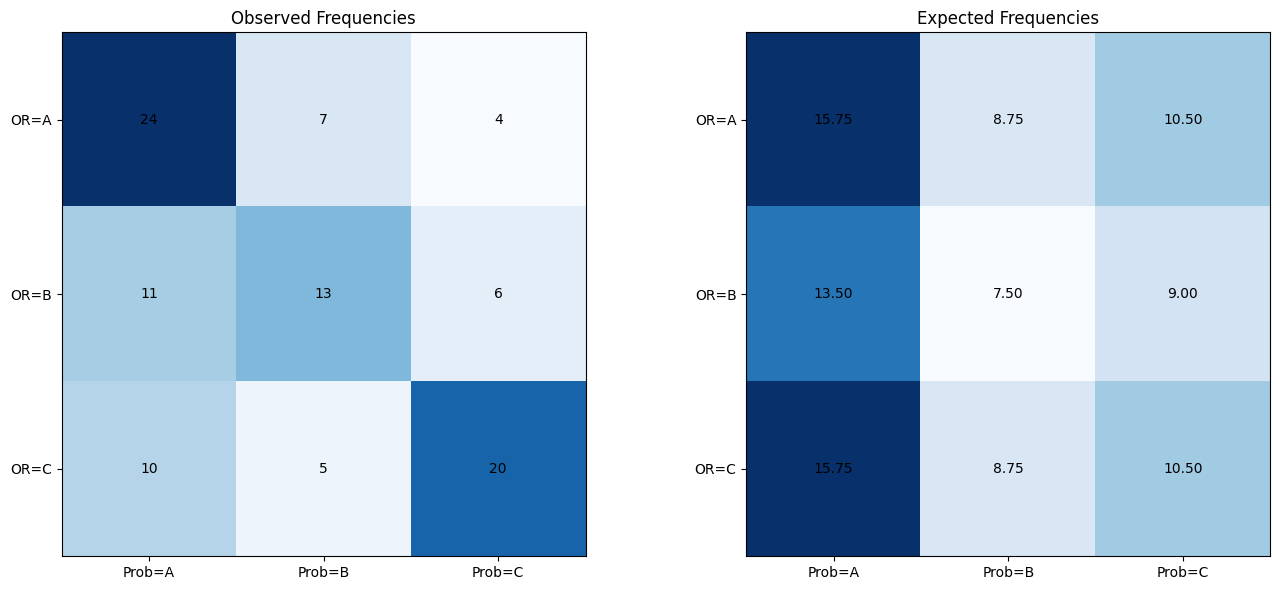

In [4]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Create the observed contingency table from the problem data
observed = np.array([
    [24, 7, 4],    # OR=A
    [11, 13, 6],   # OR=B
    [10, 5, 20]    # OR=C
])

# Create labels for better readability
or_grades = ['OR=A', 'OR=B', 'OR=C']
prob_grades = ['Prob=A', 'Prob=B', 'Prob=C']

# Convert to pandas DataFrame for better visualization
df_observed = pd.DataFrame(observed, index=or_grades, columns=prob_grades)
print("Observed Frequencies:")
print(df_observed)
print("\n")

# Calculate row and column totals
row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
total = observed.sum()

print(f"Row totals: {row_totals}")
print(f"Column totals: {col_totals}")
print(f"Grand total: {total}")
print("\n")

# Calculate expected frequencies under null hypothesis of independence
expected = np.outer(row_totals, col_totals) / total

# Convert expected frequencies to DataFrame
df_expected = pd.DataFrame(expected, index=or_grades, columns=prob_grades)
print("Expected Frequencies (under independence):")
print(df_expected.round(2))
print("\n")

# Calculate the chi-squared statistic manually
chi2_stat_manual = np.sum((observed - expected) ** 2 / expected)
print(f"Chi-squared statistic (manual calculation): {chi2_stat_manual:.4f}")

# Calculate degrees of freedom
df = (observed.shape[0] - 1) * (observed.shape[1] - 1)
print(f"Degrees of freedom: {df}")

# Find the critical value for alpha = 0.01
alpha = 0.01
critical_value = stats.chi2.ppf(1 - alpha, df)
print(f"Critical value for α = {alpha} with {df} df: {critical_value:.4f}")

# Calculate p-value
p_value = 1 - stats.chi2.cdf(chi2_stat_manual, df)
print(f"p-value: {p_value:.6f}")

# Use scipy's built-in chi2_contingency for verification
chi2_stat, p, dof, expected_scipy = stats.chi2_contingency(observed)
print(f"\nSciPy's chi2_contingency results:")
print(f"Chi-squared statistic: {chi2_stat:.4f}")
print(f"p-value: {p:.6f}")

# Decision and conclusion
print("\nDecision:")
if chi2_stat_manual > critical_value:
    print(f"Reject H₀ (χ² = {chi2_stat_manual:.4f} > {critical_value:.4f})")
    print("Conclusion: At α = 0.01, there is sufficient evidence to conclude that the grades in Probability & Statistics and Operations Research are related.")
else:
    print(f"Fail to reject H₀ (χ² = {chi2_stat_manual:.4f} ≤ {critical_value:.4f})")
    print("Conclusion: At α = 0.01, there is insufficient evidence to conclude that the grades in Probability & Statistics and Operations Research are related.")

# Visualization of observed vs expected frequencies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Observed frequencies heatmap
im1 = ax1.imshow(observed, cmap='Blues')
ax1.set_title('Observed Frequencies')
ax1.set_xticks(np.arange(len(prob_grades)))
ax1.set_yticks(np.arange(len(or_grades)))
ax1.set_xticklabels(prob_grades)
ax1.set_yticklabels(or_grades)

# Add text annotations to the heatmap
for i in range(len(or_grades)):
    for j in range(len(prob_grades)):
        ax1.text(j, i, observed[i, j], ha='center', va='center', color='black')

# Expected frequencies heatmap
im2 = ax2.imshow(expected, cmap='Blues')
ax2.set_title('Expected Frequencies')
ax2.set_xticks(np.arange(len(prob_grades)))
ax2.set_yticks(np.arange(len(or_grades)))
ax2.set_xticklabels(prob_grades)
ax2.set_yticklabels(or_grades)

# Add text annotations to the heatmap
for i in range(len(or_grades)):
    for j in range(len(prob_grades)):
        ax2.text(j, i, f'{expected[i, j]:.2f}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

### **Step 5: Decision Making**
- **Chi-Square Test Statistic:** $ \chi^2 = 26.4931 $
- **Critical Value (𝛼 = 0.01, df = 4):** $ 13.2767 $
- **p-value:** $ 2.52 \times 10^{-5} $ (extremely small)

### **Step 6: Conclusion**
Since $ \chi^2 = 26.4931 $ is greater than the critical value $ 13.2767 $ and the p-value is much smaller than $ \alpha = 0.01 $, we **reject the null hypothesis**.

**Conclusion:** There is significant statistical evidence that the grades in Probability & Statistics (Prob) and Operations Research (OR) are related.

### Problem 11 ###
Program and simulate the averages of [2, 3, 4, 5] dice for 1000 times.  
Draw the four histograms for the　sample averages of [2, 3, 4, 5] dice, respectively.  
*Reproduce the Central Limit Theorem (CLT) results.  

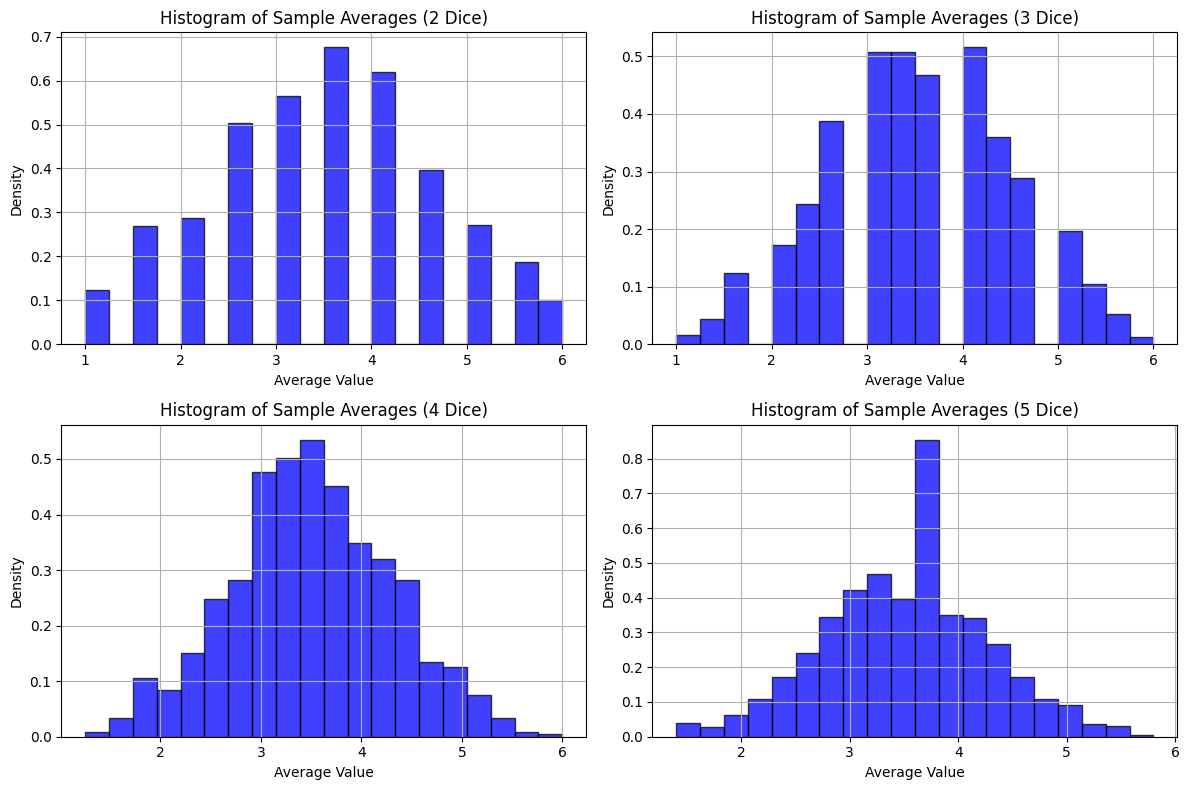

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def roll_dice(n_dice, n_trials=1000):
    """Simulates rolling `n_dice` dice `n_trials` times and computes the sample averages."""
    rolls = np.random.randint(1, 7, size=(n_trials, n_dice))  # Generate random dice rolls
    averages = rolls.mean(axis=1)  # Compute the sample averages
    return averages

def plot_histograms(n_dice_values, n_trials=1000):
    """Plots histograms for the sample averages of rolling different numbers of dice."""
    plt.figure(figsize=(12, 8))
    
    for i, n_dice in enumerate(n_dice_values, 1):
        sample_averages = roll_dice(n_dice, n_trials)
        plt.subplot(2, 2, i)
        plt.hist(sample_averages, bins=20, density=True, alpha=0.75, color='blue', edgecolor='black')
        plt.title(f'Histogram of Sample Averages ({n_dice} Dice)')
        plt.xlabel('Average Value')
        plt.ylabel('Density')
        plt.grid()
    
    plt.tight_layout()
    plt.show()

# Simulate and plot histograms for rolling 2, 3, 4, and 5 dice
plot_histograms([2, 3, 4, 5])

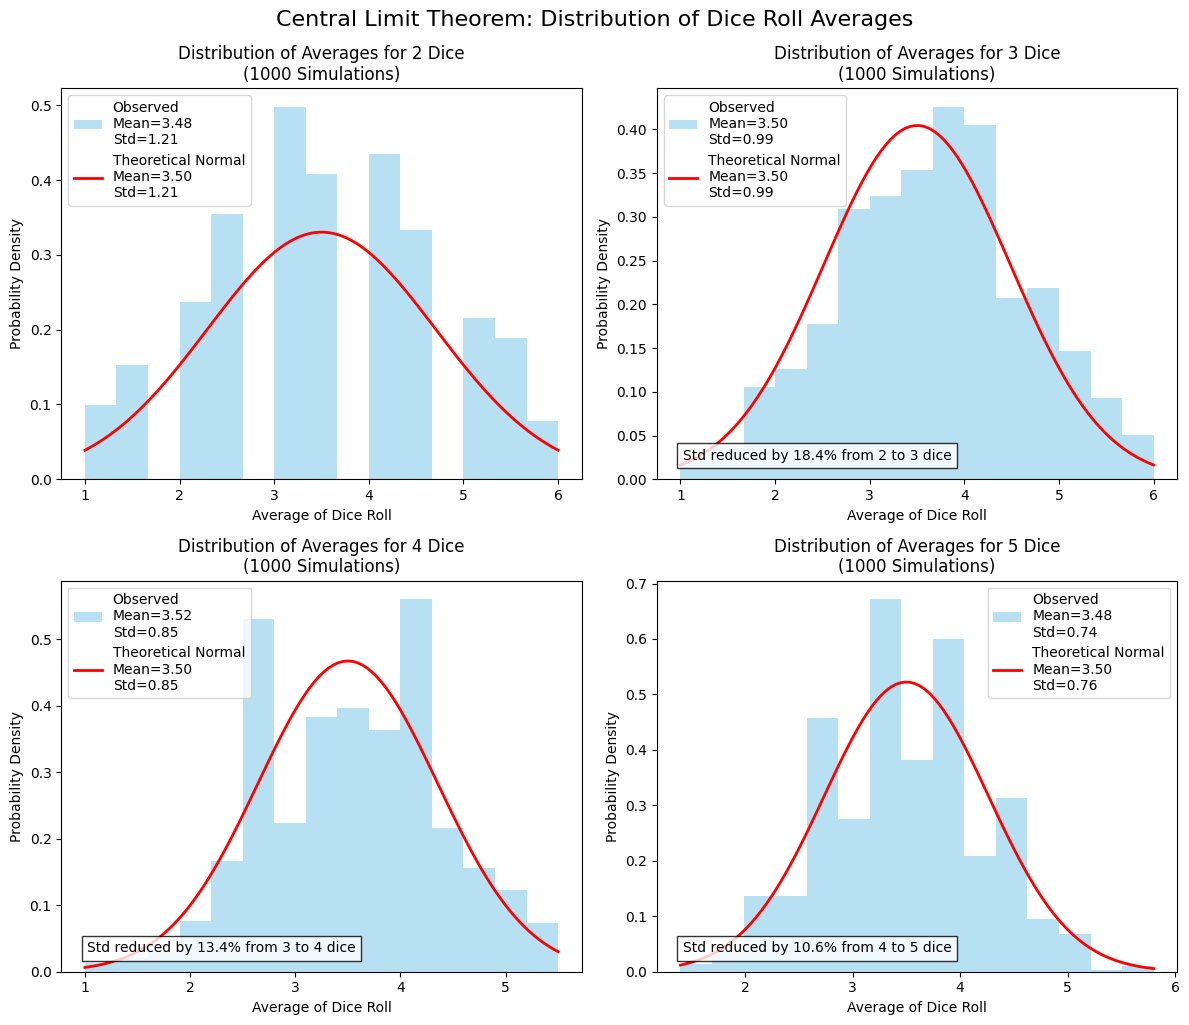

Summary Statistics:
--------------------------------------------------
Dice Count Observed Mean   Theoretical Mean Observed Std    Theoretical Std
--------------------------------------------------
2          3.4785          3.5000          1.2128          1.2076         
3          3.5030          3.5000          0.9890          0.9860         
4          3.5155          3.5000          0.8451          0.8539         
5          3.4792          3.5000          0.7424          0.7638         


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Number of simulations
num_simulations = 1000

# Number of dice to roll in each case
dice_counts = [2, 3, 4, 5]

# Store all results
all_averages = {}

# Perform simulations
for num_dice in dice_counts:
    # Array to store averages
    averages = []
    
    # Run 1000 simulations for each dice count
    for _ in range(num_simulations):
        # Roll the dice (values 1-6)
        rolls = np.random.randint(1, 7, size=num_dice)
        
        # Calculate the average
        avg = np.mean(rolls)
        
        # Store the average
        averages.append(avg)
    
    # Store all averages for this dice count
    all_averages[num_dice] = averages

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Theoretical means and standard deviations for dice rolls
theoretical_mean = 3.5  # Mean of a single die (1+2+3+4+5+6)/6
theoretical_std = np.sqrt(35/12)  # Standard deviation of a single die

# Plot histograms and overlay normal distribution for each dice count
for i, num_dice in enumerate(dice_counts):
    ax = axs[i]
    data = all_averages[num_dice]
    
    # Calculate observed statistics
    observed_mean = np.mean(data)
    observed_std = np.std(data)
    
    # Plot histogram
    counts, bins, _ = ax.hist(data, bins=15, density=True, alpha=0.6, color='skyblue', 
                             label=f'Observed\nMean={observed_mean:.2f}\nStd={observed_std:.2f}')
    
    # Create x values for normal curve
    x = np.linspace(min(bins), max(bins), 100)
    
    # Calculate theoretical standard deviation according to CLT
    clt_std = theoretical_std / np.sqrt(num_dice)
    
    # Plot normal distribution with theoretical parameters
    pdf = stats.norm.pdf(x, theoretical_mean, clt_std)
    ax.plot(x, pdf, 'r-', lw=2, label=f'Theoretical Normal\nMean={theoretical_mean:.2f}\nStd={clt_std:.2f}')
    
    # Add labels and title
    ax.set_xlabel('Average of Dice Roll')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Distribution of Averages for {num_dice} Dice\n(1000 Simulations)')
    ax.legend()
    
    # Add text showing CLT effect
    if i > 0:
        prev_std = theoretical_std / np.sqrt(dice_counts[i-1])
        current_std = theoretical_std / np.sqrt(num_dice)
        percent_reduction = (prev_std - current_std) / prev_std * 100
        ax.text(0.05, 0.05, f"Std reduced by {percent_reduction:.1f}% from {dice_counts[i-1]} to {num_dice} dice",
                transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout
plt.tight_layout()
plt.suptitle('Central Limit Theorem: Distribution of Dice Roll Averages', y=1.02, fontsize=16)

# Show plot
plt.show()

# Print summary statistics for verification
print("Summary Statistics:")
print("-" * 50)
print(f"{'Dice Count':<10} {'Observed Mean':<15} {'Theoretical Mean':<15} {'Observed Std':<15} {'Theoretical Std':<15}")
print("-" * 50)

for num_dice in dice_counts:
    data = all_averages[num_dice]
    observed_mean = np.mean(data)
    observed_std = np.std(data)
    theoretical_std = np.sqrt(35/12) / np.sqrt(num_dice)
    
    print(f"{num_dice:<10} {observed_mean:<15.4f} {theoretical_mean:<15.4f} {observed_std:<15.4f} {theoretical_std:<15.4f}")

### The Kruskal Count Card Trick
 The cards below were ordered by shuffling a deck of cards and then dealing them out.  Click on any card from the first row (the 52 cards are put in one line). Whatever number is on this card move this many cards to the right and click the new card, treating Ace as a 1 and face cards as 5. Repeat from the card just clicked. I magically know that you will (usually) end up on the 'trap' card, indicated by a thick border.
 function. The algorithm was amusingly called "The Lambda Method for Catching Kangaroos."

### Problem 12 ###
To validate the Kruskal’s count on p. 13 of slides DA01, we program and simulate the game with one deck of cards, i.e., 52 cards, for 10000 times.
Each time, the 52 cards are randomly shuffled.  
We then start from the first 10 cards, and the face cards (J/Q/K) are counted as 5 steps.  
a. (15%) What is the probability that all the first 10 cards reach the same end?  

In [47]:
import random
import numpy as np
from collections import Counter

def card_value(card):
    """Convert card rank to step value (Ace=1, 2-10=face value, J/Q/K=5)"""
    rank = card % 13
    if rank == 0:  # King
        return 5
    elif rank == 12:  # Queen
        return 5
    elif rank == 11:  # Jack
        return 5
    elif rank == 1:  # Ace
        return 1
    else:
        return rank

def simulate_kruskal_count(deck):
    """
    Simulate Kruskal Count for all 10 starting positions
    Returns True if all paths end at the same position, False otherwise
    """
    end_positions = []
    #print("deck",deck)
    # Start from each of the first 10 cards
    for start_pos in range(10):
        current_pos = start_pos
        
        while current_pos < 52:  # Stop before the last card (we need to be able to take at least one step)
            steps = card_value(deck[current_pos])
            # print()
            # print("current_pos",current_pos)
            # print("rank",deck[current_pos])
            # print("steps",steps)
            current_pos = current_pos + steps
            if current_pos >= 52:
                current_pos = current_pos - steps
                break
        
        # Record the final position
        end_positions.append(current_pos)
    
    # Check if all paths end at the same position
    return len(set(end_positions)) == 1

def run_simulation(num_trials=10000):
    """Run Kruskal Count simulation for specified number of trials"""
    # Standard deck: 52 cards (1-52)
    deck_template = list(range(1, 53))
    
    success_count = 0
    end_position_counts = Counter()
    
    for _ in range(num_trials):
        # Shuffle the deck
        deck = deck_template.copy()
        random.shuffle(deck)
        
        # Run simulation
        if simulate_kruskal_count(deck):
            success_count += 1
    
    # Calculate probability
    probability = success_count / num_trials
    return probability

# Run the simulation
if __name__ == "__main__":
    np.random.seed(42)  # For reproducibility
    random.seed(42)
    NUMBER_OF_TRIALS = 10000
    probability = run_simulation(NUMBER_OF_TRIALS)
    print(f"Probability that all 10 starting positions reach the same end: {probability:.4f} ({probability*100:.2f}%)")

Probability that all 10 starting positions reach the same end: 0.5818 (58.18%)


B. (15%) Vary the simulation settings:
the number of cards: [52, 104];
the number of steps for face cards = [1, 3, 5, 7, 9].
What are the 2 × 5 = 10 probabilities?
Discuss your observation?

In [48]:
import random
import numpy as np
from collections import Counter

def card_value(card, face_card_steps):
    """Convert card rank to step value (Ace=1, 2-10=face value, J/Q/K=face_card_steps)"""
    rank = card % 13
    if rank == 0:  # King
        return face_card_steps
    elif rank == 12:  # Queen
        return face_card_steps
    elif rank == 11:  # Jack
        return face_card_steps
    elif rank == 1:  # Ace
        return 1
    else:
        return rank

def simulate_kruskal_count(deck, num_cards, face_card_steps):
    """
    Simulate Kruskal Count for all 10 starting positions
    Returns True if all paths end at the same position, False otherwise
    """
    end_positions = []
    # Start from each of the first 10 cards
    for start_pos in range(10):
        current_pos = start_pos
        
        while current_pos < num_cards:  # Stop before the last card (we need to be able to take at least one step)
            steps = card_value(deck[current_pos], face_card_steps)
            current_pos = current_pos + steps
            if current_pos >= num_cards:
                current_pos = current_pos - steps
                break
        
        # Record the final position
        end_positions.append(current_pos)
    
    # Check if all paths end at the same position
    return len(set(end_positions)) == 1

def run_simulation(num_cards, face_card_steps, num_trials=10000):
    """Run Kruskal Count simulation for specified number of trials with varying settings"""
    # Standard deck: 52 or 104 cards (1-52 or 1-104)
    deck_template = list(range(1, num_cards + 1))
    
    success_count = 0
    for _ in range(num_trials):
        # Shuffle the deck
        deck = deck_template.copy()
        random.shuffle(deck)
        
        # Run simulation
        if simulate_kruskal_count(deck, num_cards, face_card_steps):
            success_count += 1
    
    # Calculate probability
    probability = success_count / num_trials
    return probability

# Vary the simulation settings
num_cards_options = [52, 104]
face_card_steps_options = [1, 3, 5, 7, 9]

# Run the simulations and store results
results = {}

for num_cards in num_cards_options:
    for face_card_steps in face_card_steps_options:
        probability = run_simulation(num_cards, face_card_steps)
        results[(num_cards, face_card_steps)] = probability
        print(f"Probability for {num_cards} cards, face card steps = {face_card_steps}: {probability:.4f} ({probability*100:.2f}%)")

Probability for 52 cards, face card steps = 1: 0.8303 (83.03%)
Probability for 52 cards, face card steps = 3: 0.7071 (70.71%)
Probability for 52 cards, face card steps = 5: 0.5854 (58.54%)
Probability for 52 cards, face card steps = 7: 0.4557 (45.57%)
Probability for 52 cards, face card steps = 9: 0.3374 (33.74%)
Probability for 104 cards, face card steps = 1: 0.9914 (99.14%)
Probability for 104 cards, face card steps = 3: 0.9698 (96.98%)
Probability for 104 cards, face card steps = 5: 0.9393 (93.93%)
Probability for 104 cards, face card steps = 7: 0.8940 (89.40%)
Probability for 104 cards, face card steps = 9: 0.8165 (81.65%)
